# Gradient Descent - 2 Dimension

This provides an example of using gradient descent with bi-variate data and graphing in three dimensions.

The cost function to minimise is:
$$ f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1} $$
or,
$$ f(x,y) = \frac{1}{r + 1} $$
where $r$ is $3^{-x^2 - y^2}$.

## Imports and Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm               # Get the Matplotlib colour map.
from sympy import symbols, diff
from math import log

# Create cost function as Python function:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

## Add Plot of Cost Function

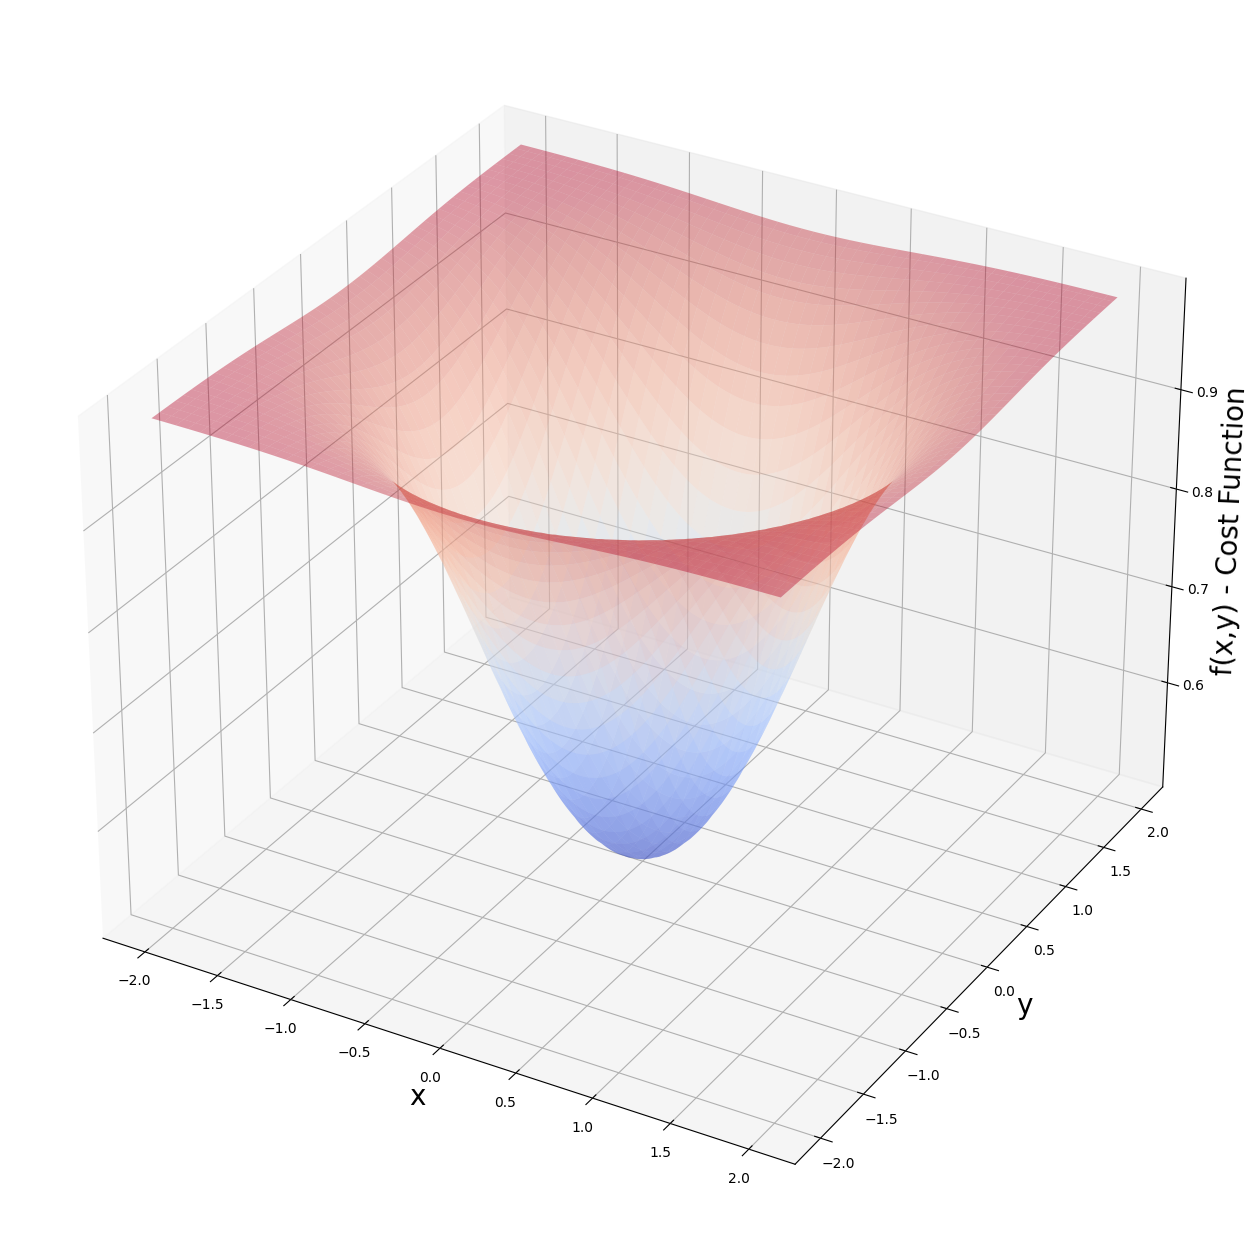

In [3]:
# Create x and y data.
xData = np.linspace(start=-2, stop=2, num=200)
yData = np.linspace(start=-2, stop=2, num=200)
# To plot the surface, these need to be 2-dimensional arrays - use numpy meshgrid() function to make 2D array.
xData, yData = np.meshgrid(xData, yData)

# Generate 3D plot
plt.figure(figsize=[16,16])
axes = plt.subplot(projection='3d')

axes.set_xlabel('x', fontsize=20)
axes.set_ylabel('y', fontsize=20)
axes.set_zlabel('f(x,y) - Cost Function', fontsize=20)
axes.plot_surface(xData, yData, f(xData, yData), cmap=cm.coolwarm, alpha=0.4)

## Partial Derivatives and Symbolic Computation

To find the slope in each of the $x$ and $y$ directions, we need to find the partial derivatives for each of these axes.

To find the partial derivatives we could refer to a website such as [Symbolab](https://www.symbolab.com/) - just type `derivative calculator` into [Google](https://www.google.com).

Alternatively, we can use the Python package [SymPy](https://www.sympy.org/en/index.html).

In [4]:
# Find partial derivative of cost function with respect to x. First, set the function variables to a and b:
a, b = symbols('x,y')
# Cost function
f(a,b)

1/(3**(-x**2 - y**2) + 1)

In [5]:
# Differentiate f(x,y) with respect to x to find the partial derivative with respect to x:
diff(f(a,b), a)

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

So, we can then write this as:
$$ \frac{\partial f}{\partial{x}} = \frac{\partial}{\partial x} \left( \frac{1}{ 3^{(-x^2 - y^2)} + 1} \right) = \frac{2 x \ln(3) \cdot  3^{-x^2 - y^2}}{ \left( 3^{-x^2 - y^2} + 1 \right)^2} $$
Then the partial derivative with respect to $y$ is:
$$ \frac{\partial f}{\partial{y}} = \frac{\partial}{\partial y} \left( \frac{1}{ 3^{(-x^2 - y^2)} + 1} \right) = \frac{2 y \ln(3) \cdot  3^{-x^2 - y^2}}{ \left( 3^{-x^2 - y^2} + 1 \right)^2} $$


In [6]:
# Evaluate the cost function for x = 1.8 and y = 1.0:
f(1.8, 1.0)

0.9906047940325824

In [7]:
# This can also be done using the evalf() function:
f(a,b).evalf(subs={a: 1.8, b: 1.0})

0.990604794032582

To evaluate the partial derivative at this point:

In [8]:
diff(f(a,b), a).evalf(subs={a: 1.8, b: 1.0})

0.0368089716197505

In [9]:
# Printing the cost function and the partial derivatives:
print("The value of the cost function at x=1.8, y=1.0 is: ", f(1.8,1.0))
print("The partial derivative wrt x at x=1.8, y=1.0 is:   ", diff(f(a,b), a).evalf(subs={a: 1.8, b: 1.0}))
print("The partial derivative wrt y at x=1.8, y=1.0 is:   ", diff(f(a,b), b).evalf(subs={a: 1.8, b: 1.0}))

The value of the cost function at x=1.8, y=1.0 is:  0.9906047940325824
The partial derivative wrt x at x=1.8, y=1.0 is:    0.0368089716197505
The partial derivative wrt y at x=1.8, y=1.0 is:    0.0204494286776392


This means at the point $x = 1.8$ and $y = 1.0$ the slope in the $x$ direction is $0.03681$, and the slope in the $y$ direction is $0.02045$.

## Batch Gradient Descent with SymPy
Here we implement a batch gradient descent algorithm using the SymPy library:

In [10]:
# Setup algorithm parameters
multiplier = 0.1
maximum_iterations = 200
parameters = np.array([1.8, 1.0])   # Initial x and y estimates

for n in range(maximum_iterations):
    gradient_x = diff(f(a,b), a).evalf(subs={a:parameters[0], b:parameters[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:parameters[0], b:parameters[1]})
    gradients = np.array([gradient_x, gradient_y])
    parameters = parameters - multiplier * gradients

print("Values in gradient array ", gradients)
print("Minimum occurs at x value of: ", parameters[0])
print("Minimum occurs at y value of: ", parameters[1])
print("The value of the cost function is: ", f(parameters[0], parameters[1]))

Values in gradient array  [0.000461440542096373 0.000256355856720208]
Minimum occurs at x value of:  0.000793898510134722
Minimum occurs at y value of:  0.000441054727852623
The value of the cost function is:  0.500000226534985


## Partial Derivative Functions in Python
Using Python functions to calculate the partial derivatives is likely to be much faster than using SymPy to evaluate these on each iteration.

In [11]:
# Partial derivative with respect to x:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2 * x * log(3) * r / (r + 1)**2

# Partial derivative with respect to y:
def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2 * y * log(3) * r / (r + 1)**2

In [12]:
# Setup algorithm parameters
multiplier = 0.1
maximum_iterations = 2000
parameters = np.array([1.8, 1.0])  # Initial x and y estimates

for n in range(maximum_iterations):
    gradient_x = fpx(parameters[0], parameters[1])
    gradient_y = fpy(parameters[0], parameters[1])
    gradients = np.array([gradient_x, gradient_y])
    parameters = parameters - multiplier * gradients

print("Values in gradient array ", gradients)
print("Minimum occurs at x value of: ", parameters[0])
print("Minimum occurs at y value of: ", parameters[1])
print("The value of the cost function is: ", f(parameters[0], parameters[1]))

Values in gradient array  [3.15330960e-48 1.75183867e-48]
Minimum occurs at x value of:  5.425201225496559e-48
Minimum occurs at y value of:  3.0140006808314185e-48
The value of the cost function is:  0.5


## Plotting Gradient Descent

In [26]:
# Setup algorithm parameters
multiplier = 0.1
maximum_iterations = 200
parameters = np.array([1.8, 1.0])  # Initial x and y estimates
values_array = parameters.reshape(1, 2)

for n in range(maximum_iterations):
    gradient_x = fpx(parameters[0], parameters[1])
    gradient_y = fpy(parameters[0], parameters[1])
    gradients = np.array([gradient_x, gradient_y])
    parameters = parameters - multiplier * gradients
    # values_array = np.append(values_array, parameters.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, parameters.reshape(1,2)), axis=0)

print("Values in gradient array ", gradients)
print("Minimum occurs at x value of: ", parameters[0])
print("Minimum occurs at y value of: ", parameters[1])
print("The value of the cost function is: ", f(parameters[0], parameters[1]))

Values in gradient array  [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The value of the cost function is:  0.5000002265349848


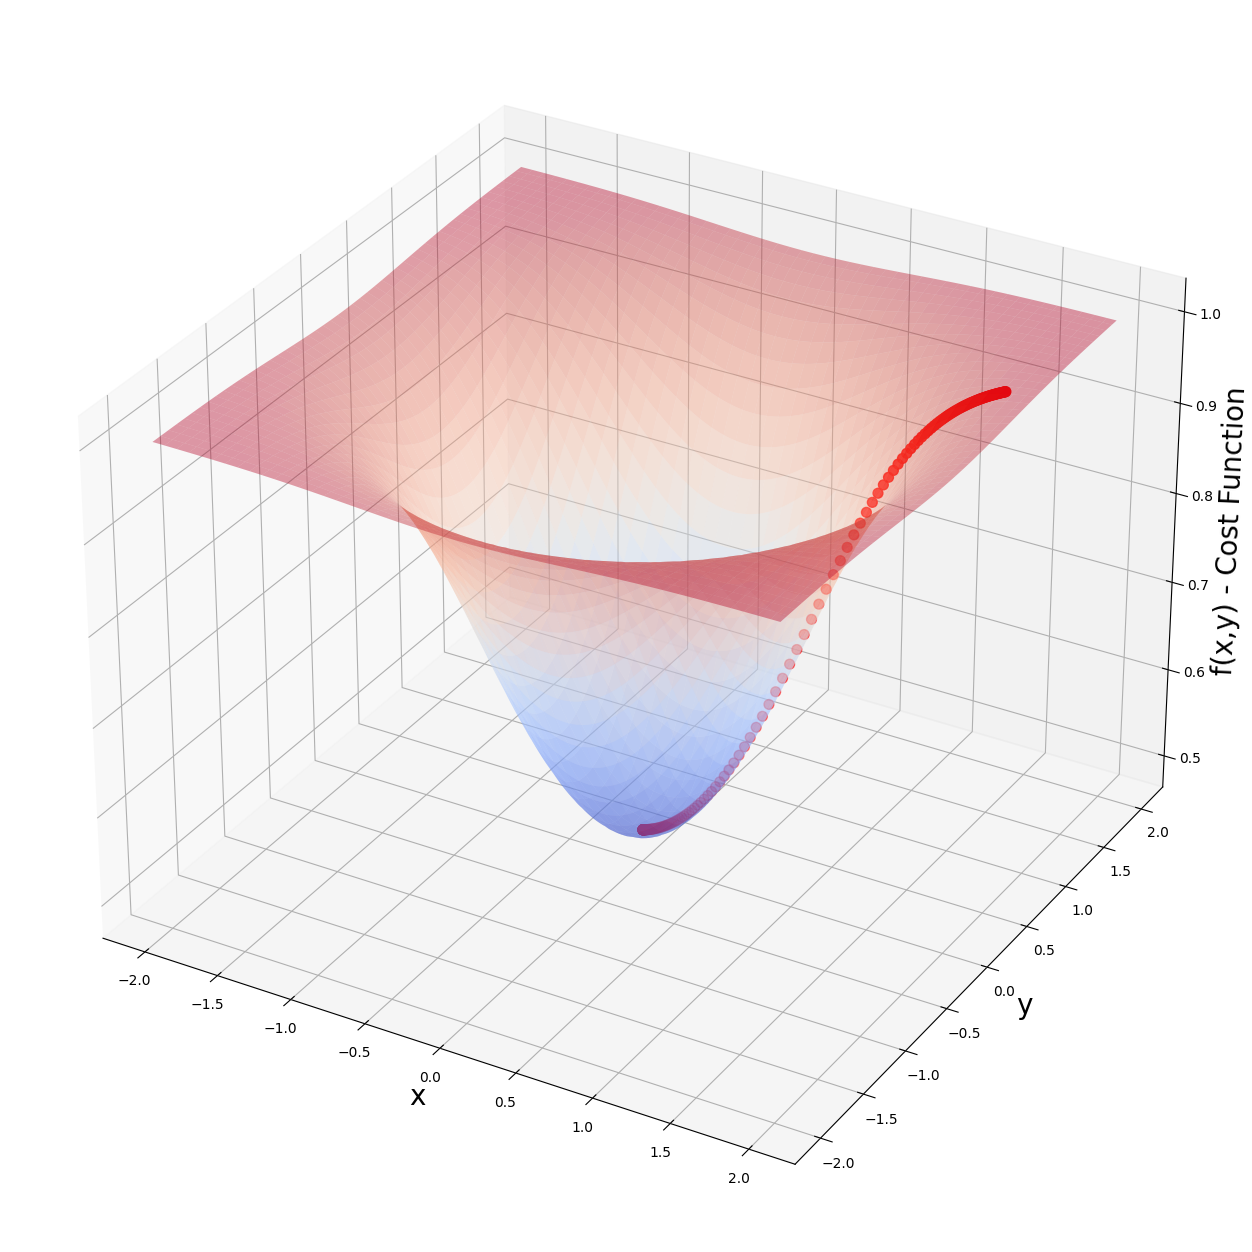

In [27]:
# Create x and y data.
xData = np.linspace(start=-2, stop=2, num=200)
yData = np.linspace(start=-2, stop=2, num=200)
# To plot the surface, these need to be 2-dimensional arrays - use numpy meshgrid() function to make 2D array.
xData, yData = np.meshgrid(xData, yData)

# Generate 3D plot
plt.figure(figsize=[16, 16])
axes = plt.subplot(projection='3d')

axes.set_xlabel('x', fontsize=20)
axes.set_ylabel('y', fontsize=20)
axes.set_zlabel('f(x,y) - Cost Function', fontsize=20)
axes.plot_surface(xData, yData, f(xData, yData), cmap=cm.coolwarm, alpha=0.4)
axes.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=50, color='red')